### Credit Score Evalution Project - using cleaned data

#### Imports

In [1]:
import sklearn
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.manifold import TSNE
from sklearn.svm import SVC

In [2]:
credit_score=pd.read_csv("train_clean.csv")

#### Changing data to numerical categories

In [3]:
credit_score.head(5)

,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,...,Missing_Information,Home Equity Loan,Debt Consolidation Loan,Credit-Builder Loan,Auto Loan,Payday Loan,Mortgage Loan,Years,Months,Previous_Classification
0,April,17,Lawyer,30625.94,2706.161667,6,5,27,2,64,...,0,1,0,1,0,0,0,10,5,NCR
1,August,18,Lawyer,30625.94,2706.161667,6,5,27,2,57,...,0,1,0,1,0,0,0,10,9,Poor
2,February,17,Lawyer,30625.94,2706.161667,6,5,27,2,62,...,0,1,0,1,0,0,0,10,3,Poor
3,January,17,Lawyer,30625.94,2706.161667,6,5,27,2,62,...,0,1,0,1,0,0,0,10,2,Poor
4,July,18,Lawyer,30625.94,2706.161667,6,5,27,2,62,...,0,1,0,1,0,0,0,10,8,Standard


In [4]:
credit_cat=credit_score.copy()

In [5]:
encoder = LabelEncoder()
credit_cat['Month'] = encoder.fit_transform(credit_cat['Month'])
month_mapping = {index: label for index, label in enumerate(encoder.classes_)}

credit_cat['Occupation'] = encoder.fit_transform(credit_cat['Occupation'])
occupation_mapping = {index: label for index, label in enumerate(encoder.classes_)}

credit_cat['Credit_Mix'] = encoder.fit_transform(credit_cat['Credit_Mix'])
credit_mix_mapping = {index: label for index, label in enumerate(encoder.classes_)}

credit_cat['Payment_of_Min_Amount'] = encoder.fit_transform(credit_cat['Payment_of_Min_Amount'])
payment_of_min_ammount_mapping = {index: label for index, label in enumerate(encoder.classes_)}

credit_cat['Payment_Behaviour'] = encoder.fit_transform(credit_cat['Payment_Behaviour'])
payment_behaviour_mapping = {index: label for index, label in enumerate(encoder.classes_)}

credit_cat['Previous_Classification'] = encoder.fit_transform(credit_cat['Previous_Classification'])
previous_classification_mapping = {index: label for index, label in enumerate(encoder.classes_)}

credit_cat['SSN_Location'] = encoder.fit_transform(credit_cat['SSN_Location'])
ssn_location_mapping = {index: label for index, label in enumerate(encoder.classes_)}

credit_cat['Credit_Score'] = encoder.fit_transform(credit_cat['Credit_Score'])
credit_score_mapping = {index: label for index, label in enumerate(encoder.classes_)}

print("Month mapping:", month_mapping)
print("Occupation mapping:", occupation_mapping)
print("Credit_Mix mapping:", credit_mix_mapping)
print("Payment_Of_Min_Ammount mapping:", payment_of_min_ammount_mapping)
print("Payment_Behaviour mapping:", payment_behaviour_mapping)
print("Previous_Classification mapping:", previous_classification_mapping)
print("SSN mapping:", ssn_location_mapping)
print("Credit_Score mapping:", credit_score_mapping)

Month mapping: {0: 'April', 1: 'August', 2: 'February', 3: 'January', 4: 'July', 5: 'June', 6: 'March', 7: 'May'}
Occupation mapping: {0: 'Accountant', 1: 'Architect', 2: 'Developer', 3: 'Doctor', 4: 'Engineer', 5: 'Entrepreneur', 6: 'Journalist', 7: 'Lawyer', 8: 'Manager', 9: 'Mechanic', 10: 'Media_Manager', 11: 'Musician', 12: 'Scientist', 13: 'Teacher', 14: 'Unemployed', 15: 'Writer'}
Credit_Mix mapping: {0: 'Bad', 1: 'Good', 2: 'Missing', 3: 'Standard'}
Payment_Of_Min_Ammount mapping: {0: 'NM', 1: 'No', 2: 'Yes'}
Payment_Behaviour mapping: {0: 'High_spent_Large_value_payments', 1: 'High_spent_Medium_value_payments', 2: 'High_spent_Small_value_payments', 3: 'Low_spent_Large_value_payments', 4: 'Low_spent_Medium_value_payments', 5: 'Low_spent_Small_value_payments', 6: 'Missing'}
Previous_Classification mapping: {0: 'Good', 1: 'NCR', 2: 'Poor', 3: 'Standard'}
SSN mapping: {0: '#F%', 1: '000', 2: '001', 3: '002', 4: '003', 5: '004', 6: '005', 7: '006', 8: '007', 9: '008', 10: '009', 11

In [6]:
credit_cat.head(5)

,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,...,Missing_Information,Home Equity Loan,Debt Consolidation Loan,Credit-Builder Loan,Auto Loan,Payday Loan,Mortgage Loan,Years,Months,Previous_Classification
0,0,17,7,30625.94,2706.161667,6,5,27,2,64,...,0,1,0,1,0,0,0,10,5,1
1,1,18,7,30625.94,2706.161667,6,5,27,2,57,...,0,1,0,1,0,0,0,10,9,2
2,2,17,7,30625.94,2706.161667,6,5,27,2,62,...,0,1,0,1,0,0,0,10,3,2
3,3,17,7,30625.94,2706.161667,6,5,27,2,62,...,0,1,0,1,0,0,0,10,2,2
4,4,18,7,30625.94,2706.161667,6,5,27,2,62,...,0,1,0,1,0,0,0,10,8,3


#### visualizations to understand the data

##### Correlation Matrix

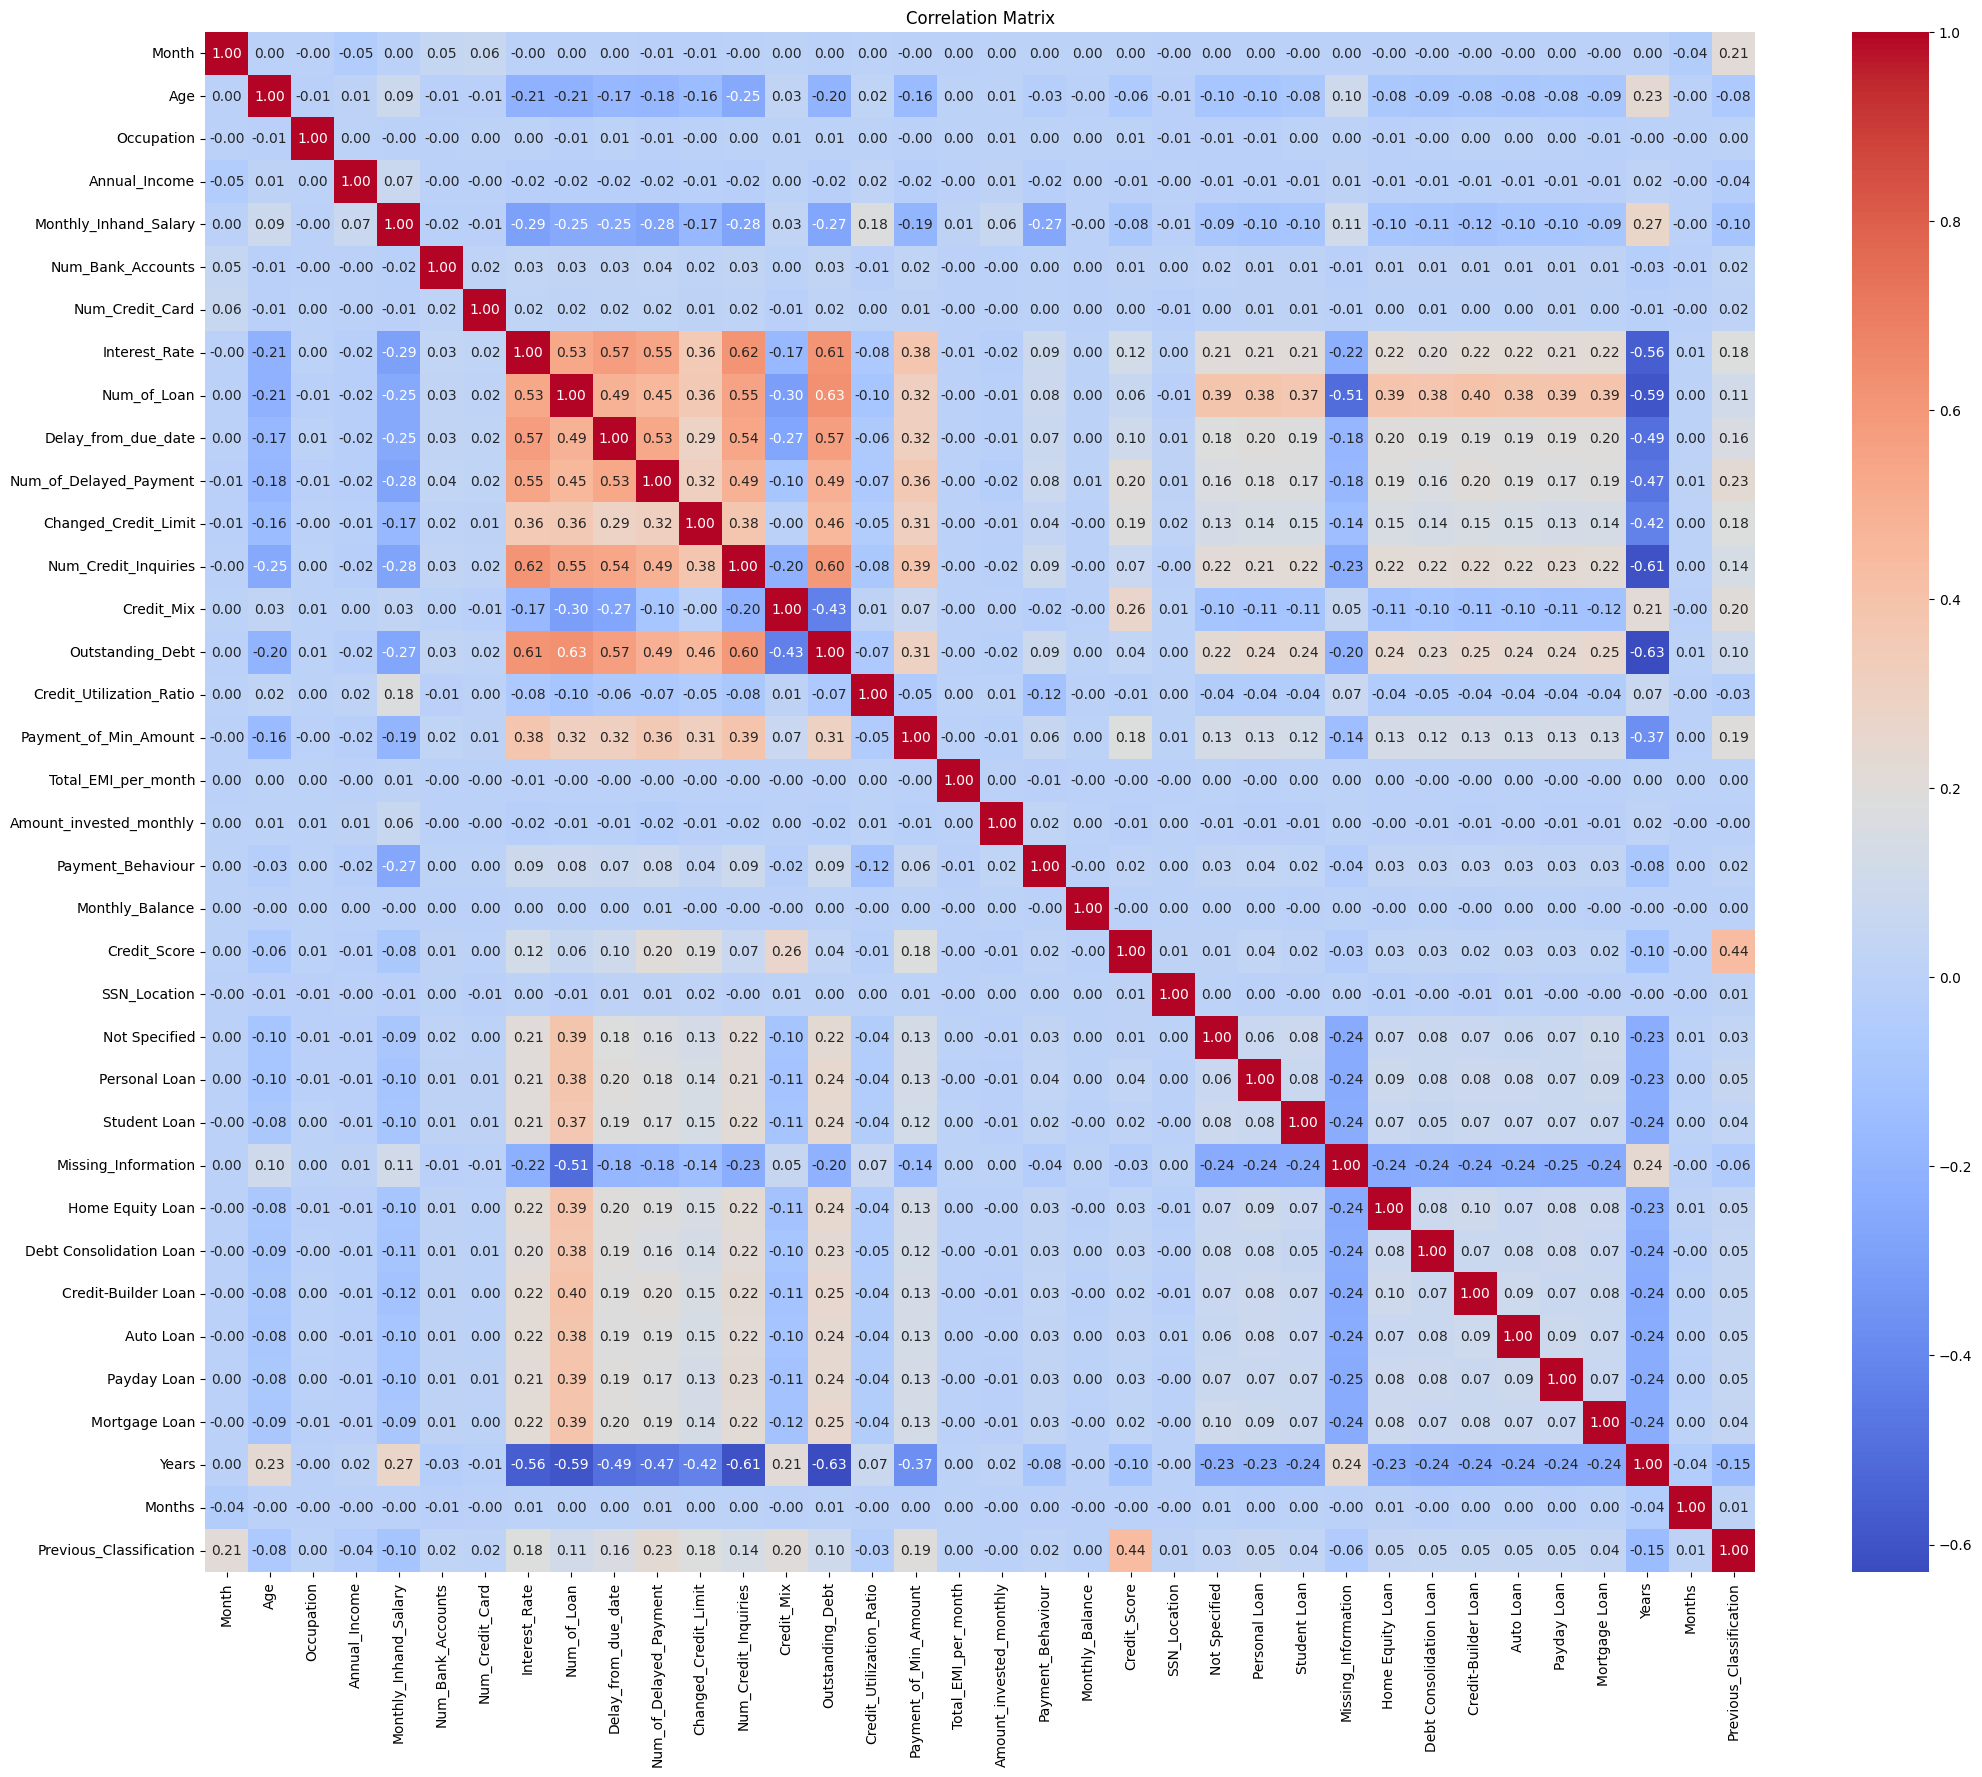

In [7]:
Image(filename="Corr_Matrix.png")

##### Histograms

In [8]:
def plot_histograms(dataframe):
    for column in dataframe.columns:
        try:
            if dataframe[column].dtype in ['int64', 'float64']:
                plt.figure(figsize=(8, 6))
                plt.hist(dataframe[column], bins='auto')
                plt.xlabel(column)
                plt.ylabel('Frequency')
                plt.title(f'Histogram of {column}')
                plt.show()
        except:
            print("Maximum size exceeded, skipping histogram for {column}")

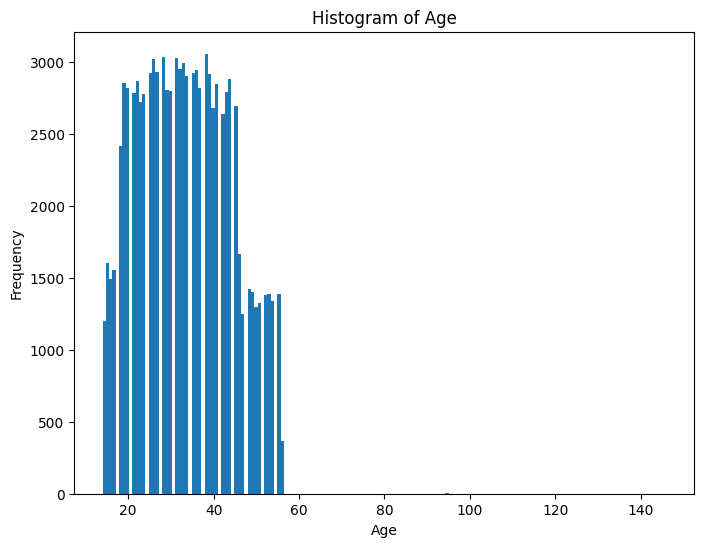

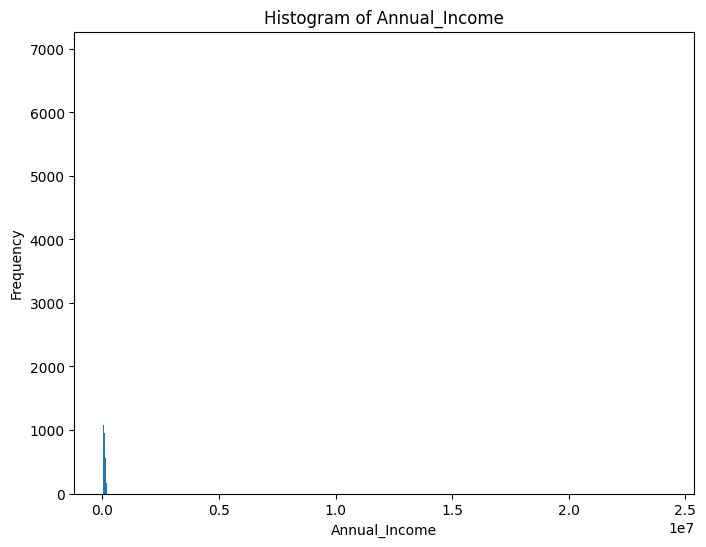

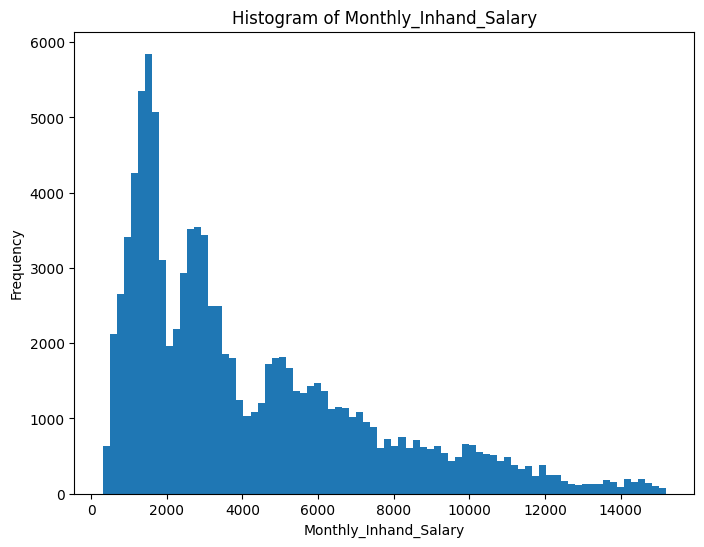

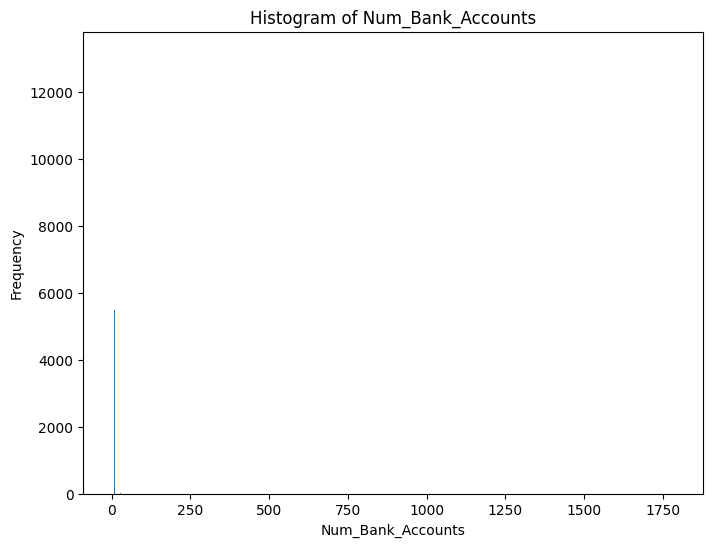

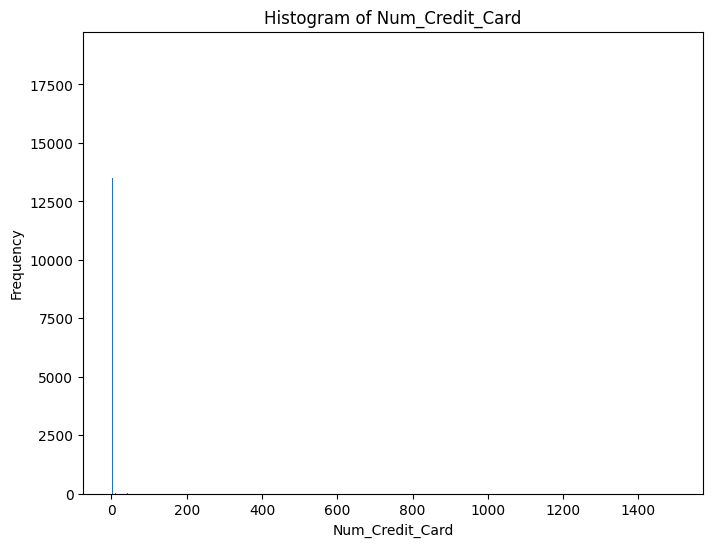

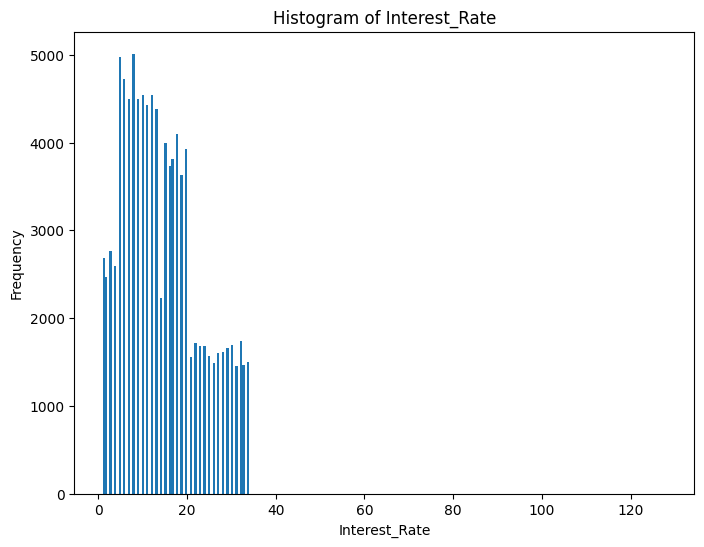

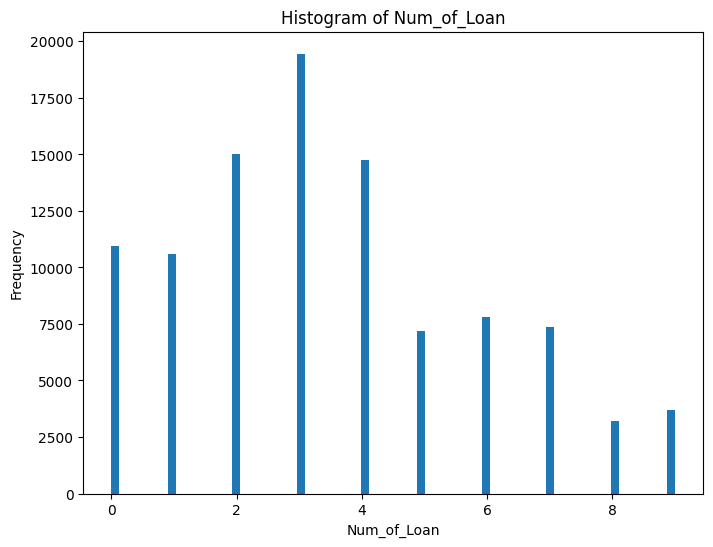

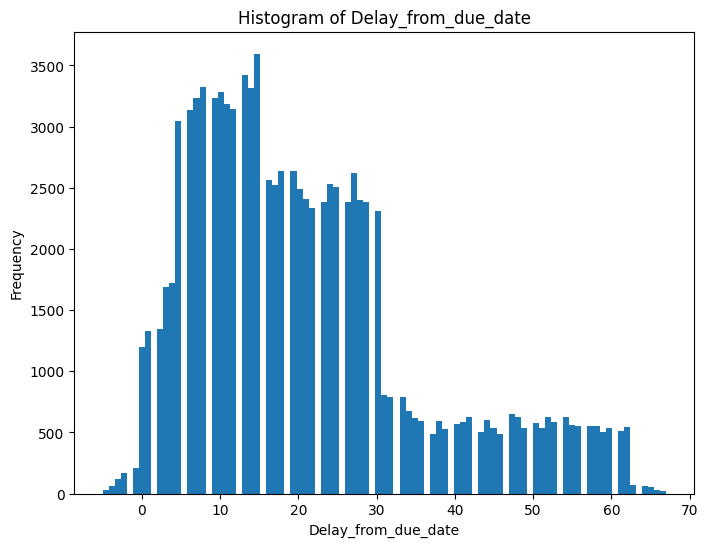

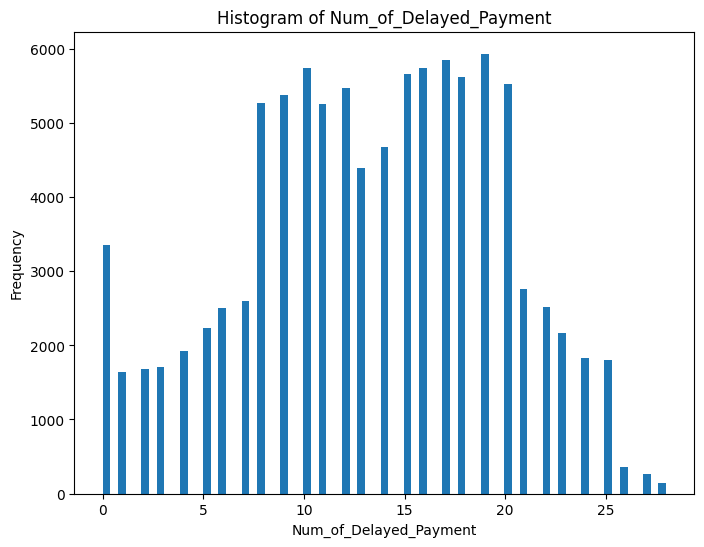

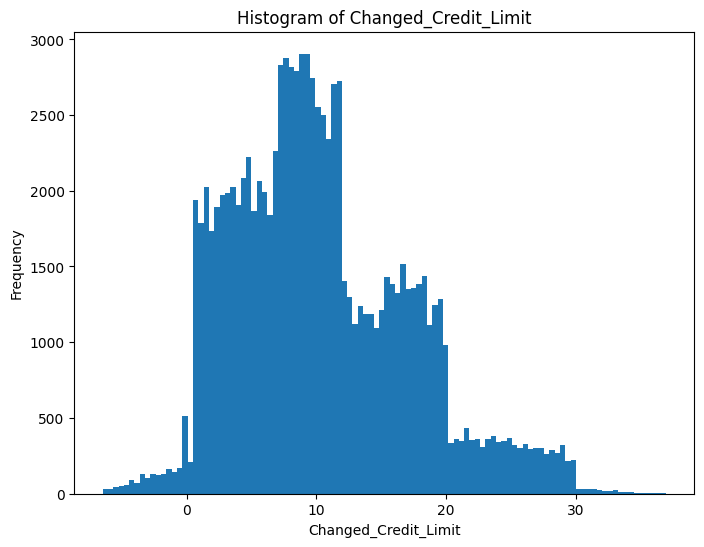

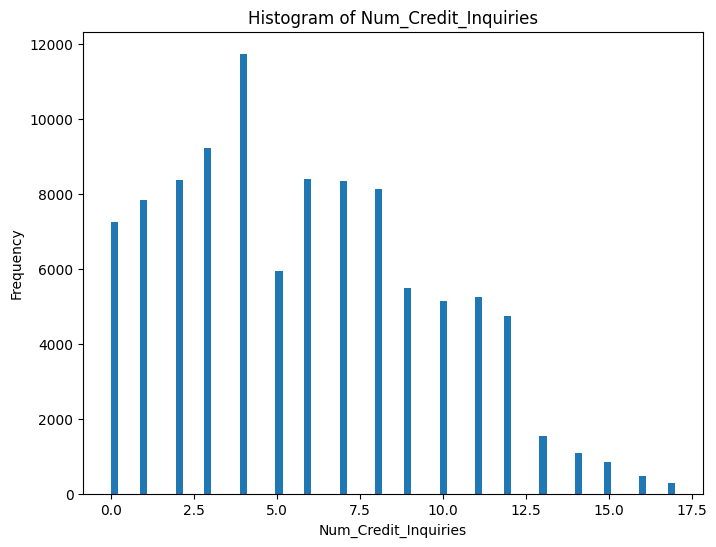

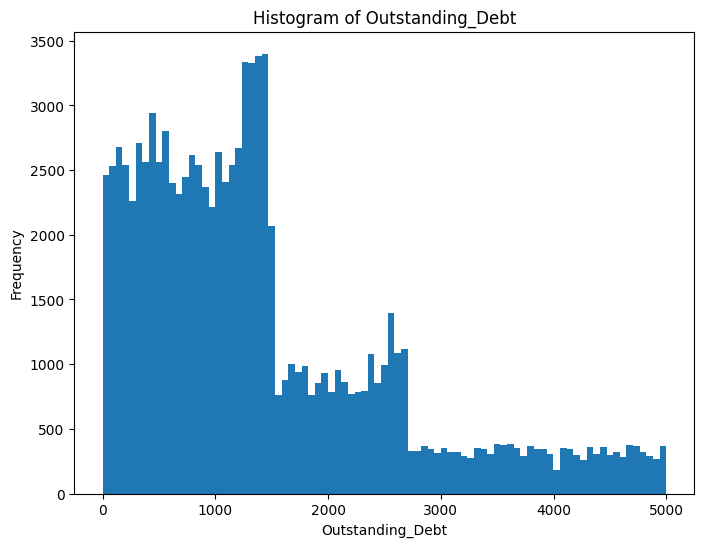

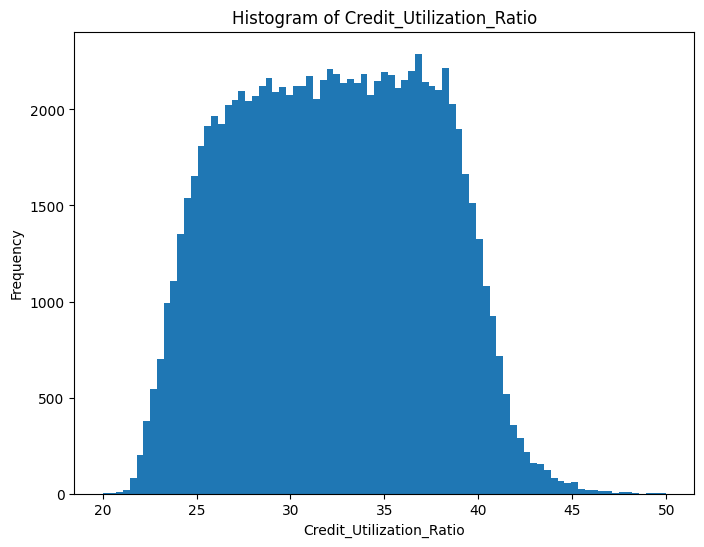

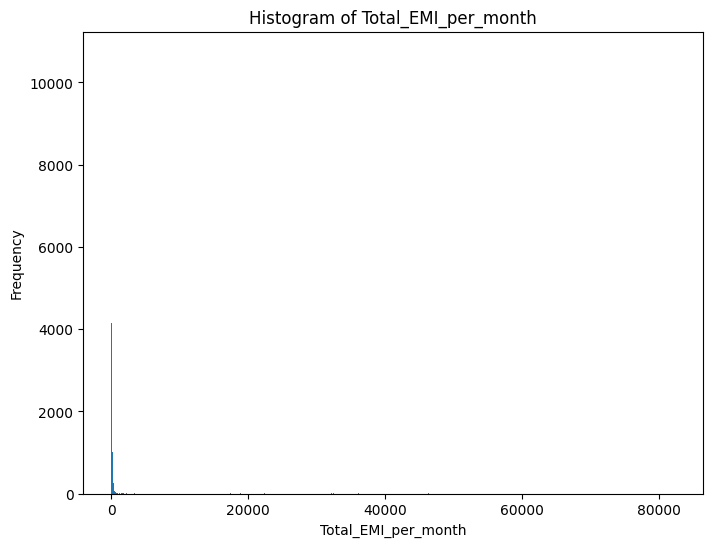

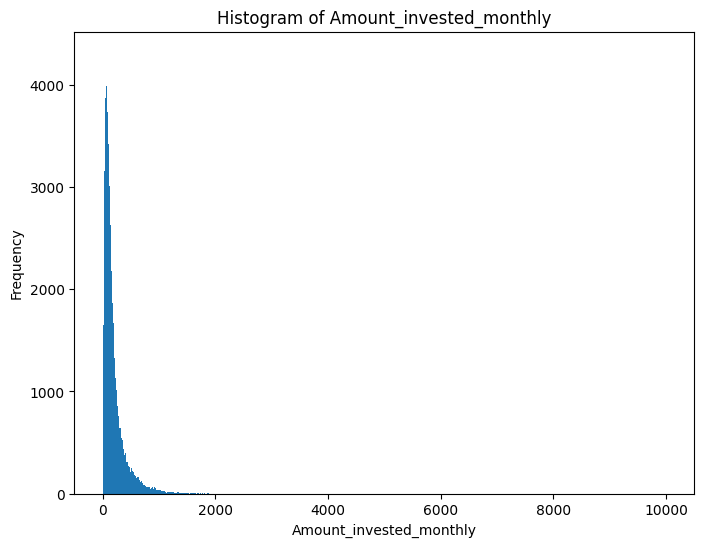

Maximum size exceeded, skipping histogram for {column}


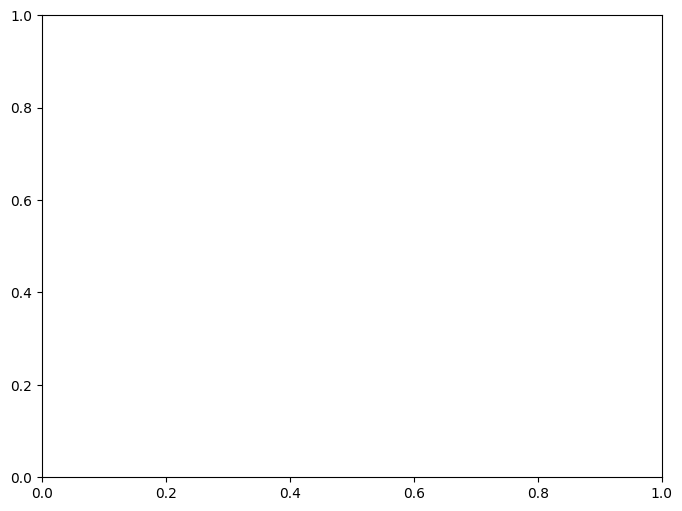

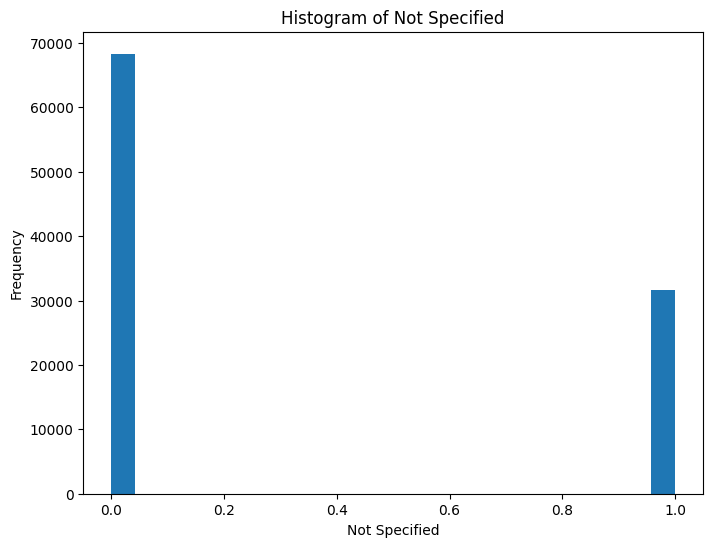

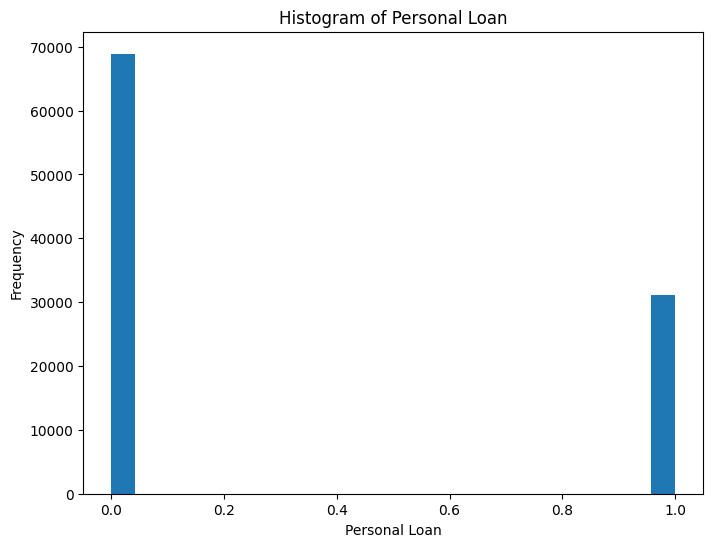

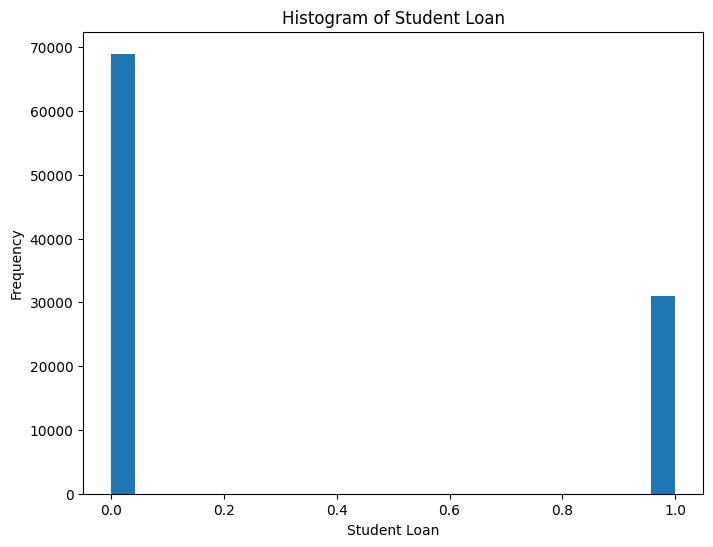

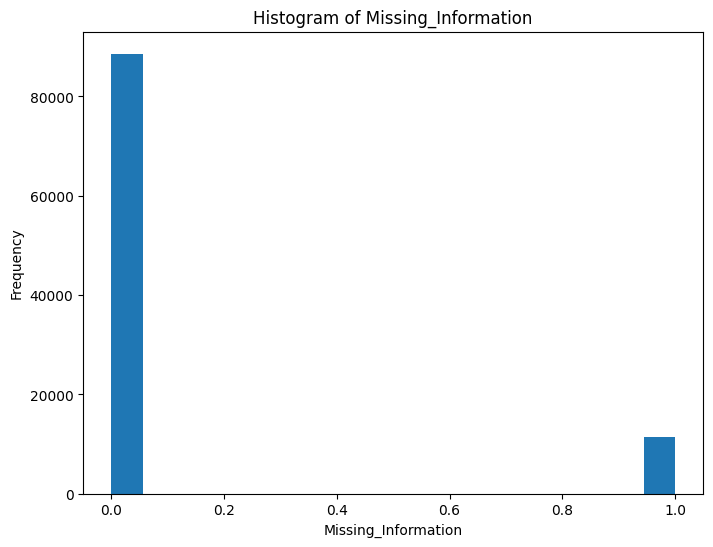

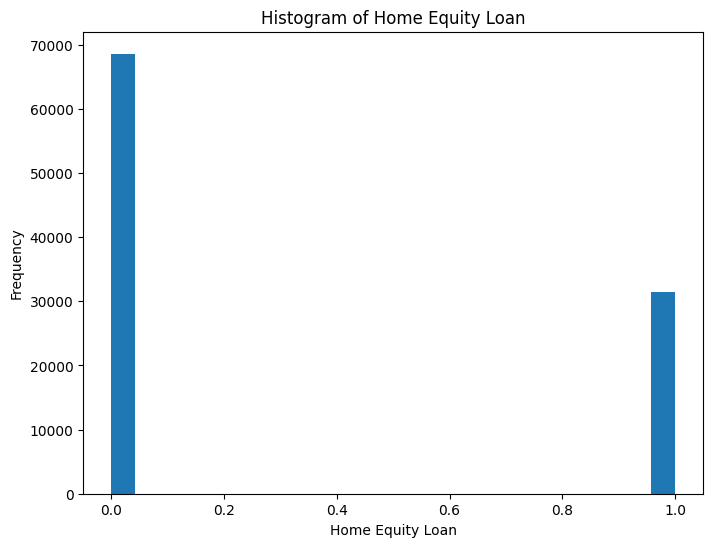

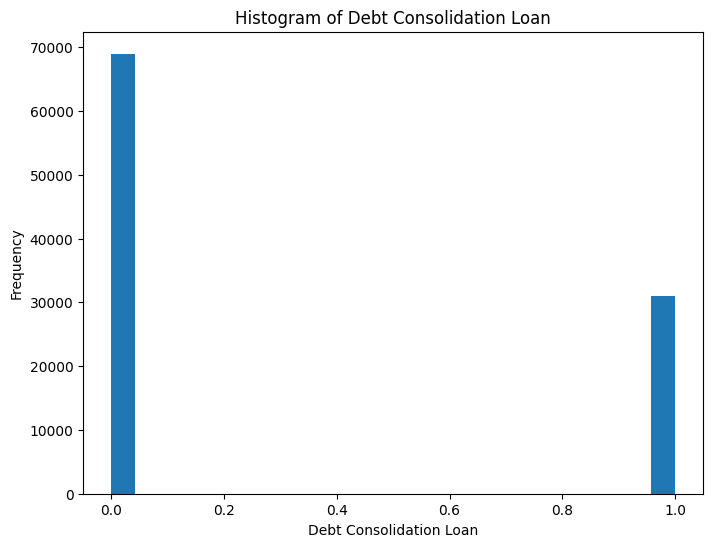

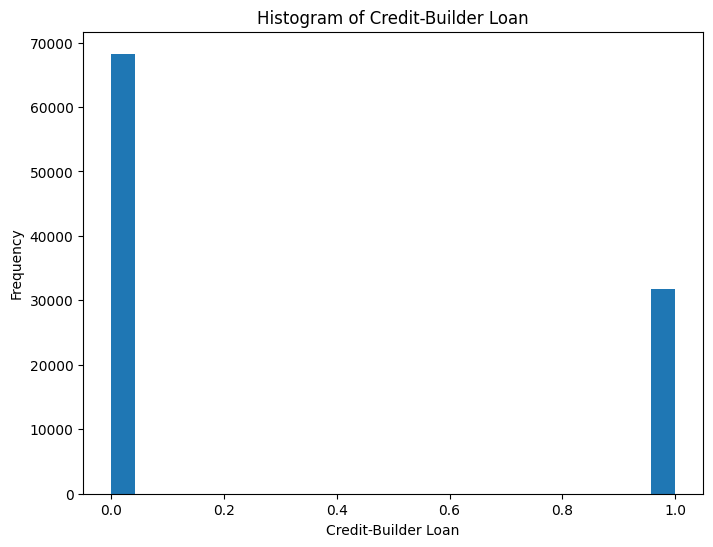

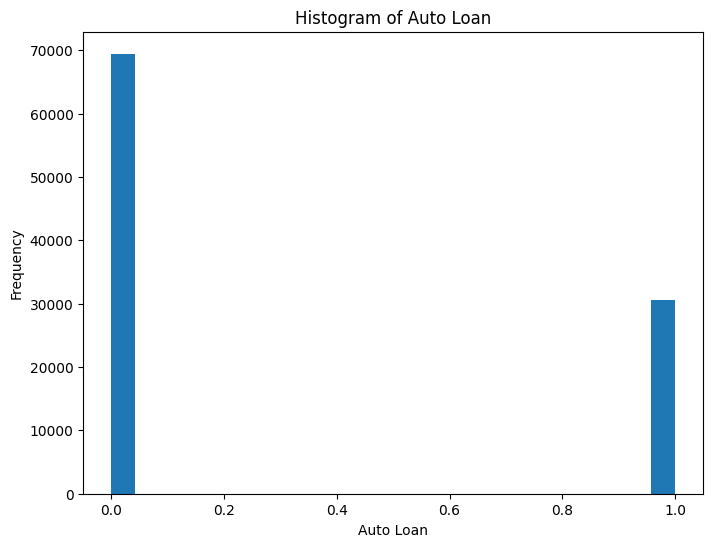

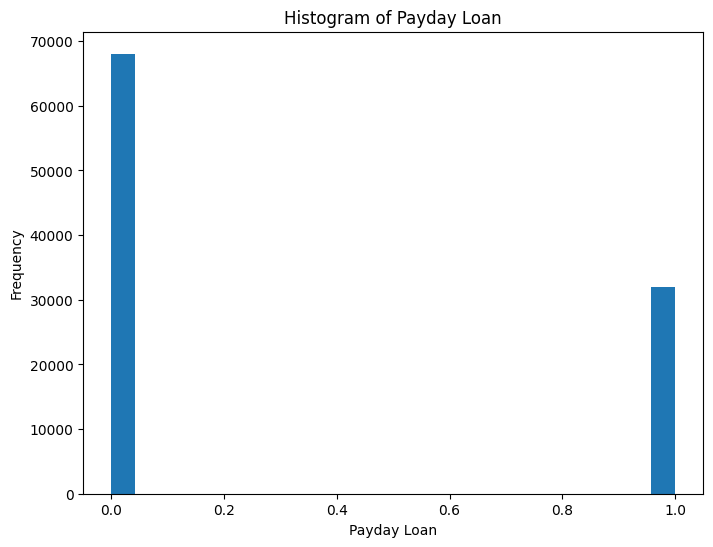

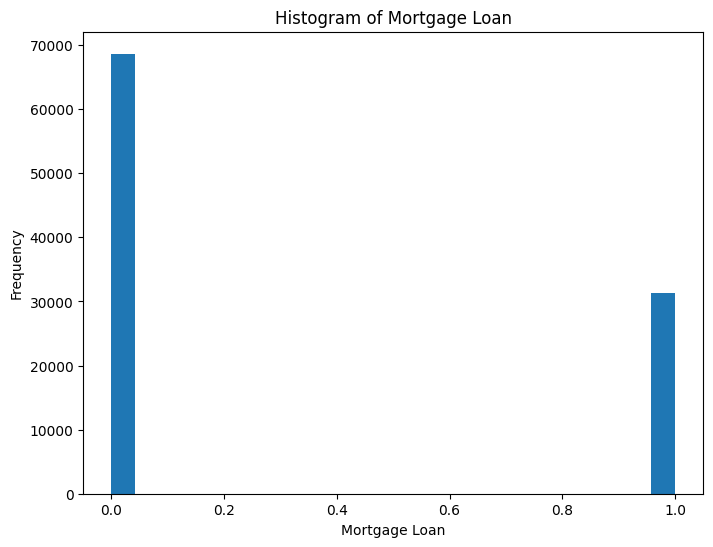

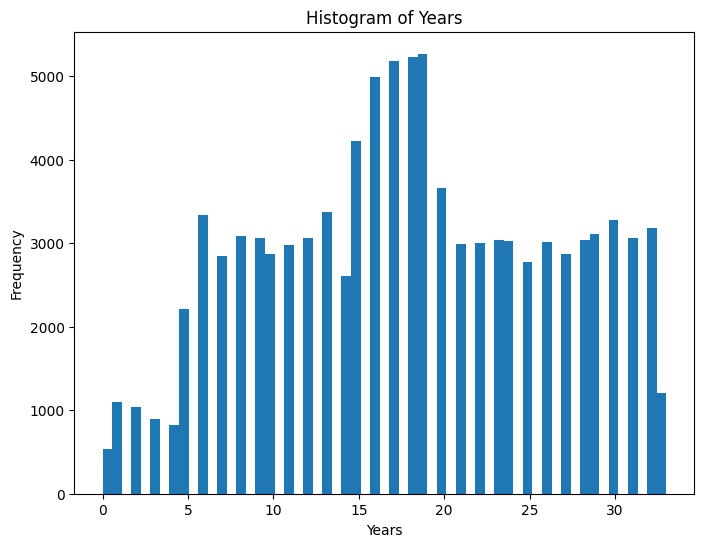

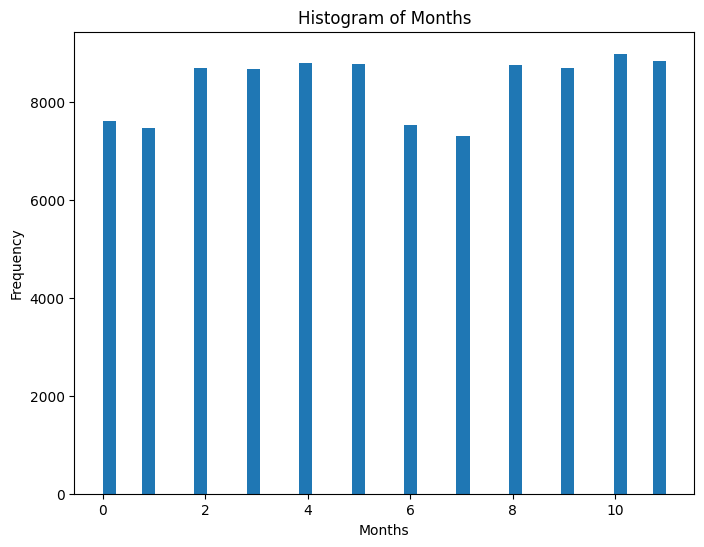

In [9]:
plot_histograms(credit_cat)

#### Splitting between training, test and validation sets

Rescaling the data

In [10]:
def scale_data(df, columns_to_normalize):
    scaler = MinMaxScaler()
    scaling_params = {}

    for column in columns_to_normalize:
        scaling_params[column] = {'min': df[column].min(), 'max': df[column].max()}
        df[column] = scaler.fit_transform(df[[column]])
        
    return scaler, scaling_params

columns_to_normalize = list(credit_cat.columns)
columns_to_normalize.remove("Credit_Score")
scaler, scaling_params = scale_data(credit_cat, columns_to_normalize)

In [11]:
def rescale_data(df, scaling_params):
    for column in scaling_params.keys():
        if column in df.columns:
            min_val = scaling_params[column]['min']
            max_val = scaling_params[column]['max']
            df[column] = (df[column] * (max_val - min_val)) + min_val
    return df

Splitting the data

In [12]:
X = credit_cat.drop('Credit_Score', axis=1)
y = credit_cat['Credit_Score']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=23)

#### Training the models

In [13]:
# Define the pipeline
pipeline = Pipeline([
    ('dimensionality_reduction', PCA()),  # Choose the dimensionality reduction technique
    ('classifier', DecisionTreeClassifier())  # Choose the classifier model
])

# Define the hyperparameters for grid search
parameters = {
    'dimensionality_reduction': [None, PCA(n_components=15), PCA(n_components=20), PCA(n_components=30),
                                 TSNE(n_components=30, perplexity=35, learning_rate=100),
                                 TSNE(n_components=15, perplexity=35, learning_rate=100)],  # Include all desired dimensionality reduction techniques
    'classifier': [
        {'model': DecisionTreeClassifier(), 'params': {'classifier__max_depth': [None, 3, 5, 7, 12]}},  # Decision Tree with different max_depth
        {'model': GaussianNB(), 'params': {}},  # Gaussian Naive Bayes
        {'model': KNeighborsClassifier(), 'params': {'classifier__n_neighbors': [3, 4, 5, 6, 7, 12, 20, 100], 'classifier__metric':['l1','minkowski', 'cosine']}},  # K-Nearest Neighbors with different n_neighbors
        {'model': RandomForestClassifier(), 'params': {'classifier__n_estimators': [50, 100, 200, 500], 'classifier__max_depth':[None, 3,7,12,15]}},  # Random Forest with different n_estimators
        {'model': LogisticRegression(), 'params': {'classifier__C': [1.0, 10.0, 100.0]}} # Logistic Regression
    ]
}

results = {}

# Perform grid search for hyperparameter tuning
best_accuracy = 0
best_model = None
for dim_reduction in parameters["dimensionality_reduction"]:
    for param_set in parameters['classifier']:
        try:
            pipeline.set_params(dimensionality_reduction=dim_reduction)
            pipeline.set_params(classifier=param_set['model'])

            grid_search = GridSearchCV(pipeline, param_set['params'], cv=5, scoring='accuracy')
            grid_search.fit(X_train, y_train)

            # Store the results in the dictionary
            result_key = f"{dim_reduction} + {param_set['model'].__class__.__name__}"
            results[result_key] = {
                "Dimensionality Reduction": dim_reduction,
                "Model": param_set['model'].__class__.__name__,
                "Best Hyperparameters": grid_search.best_params_,
                "Best Accuracy": grid_search.best_score_
            }

            # Print the best hyperparameters and accuracy
            print("Dimensionality Reduction: ", dim_reduction)
            print("Model: ", param_set['model'].__class__.__name__)
            print("Best Hyperparameters: ", grid_search.best_params_)
            print("Best Accuracy: ", grid_search.best_score_)

            accuracy = grid_search.best_score_
            if accuracy > best_accuracy:
                best_accuracy = accuracy
                best_model = grid_search.best_estimator_
        except:
            pass

# Convert the dictionary to a dataframe
results_df = pd.DataFrame.from_dict(results, orient='index')

# Sort the dataframe by accuracy in descending order
results_df.sort_values(by="Best Accuracy", ascending=False, inplace=True)

Dimensionality Reduction:  None
Model:  DecisionTreeClassifier
Best Hyperparameters:  {'classifier__max_depth': 7}
Best Accuracy:  0.7660857142857143
Dimensionality Reduction:  None
Model:  GaussianNB
Best Hyperparameters:  {}
Best Accuracy:  0.5445142857142857
Dimensionality Reduction:  None
Model:  KNeighborsClassifier
Best Hyperparameters:  {'classifier__metric': 'l1', 'classifier__n_neighbors': 6}
Best Accuracy:  0.7583428571428572
Dimensionality Reduction:  None
Model:  RandomForestClassifier
Best Hyperparameters:  {'classifier__max_depth': None, 'classifier__n_estimators': 500}
Best Accuracy:  0.7799285714285714


c:\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_resu

Dimensionality Reduction:  None
Model:  LogisticRegression
Best Hyperparameters:  {'classifier__C': 10.0}
Best Accuracy:  0.6829857142857143
Dimensionality Reduction:  PCA(n_components=15)
Model:  DecisionTreeClassifier
Best Hyperparameters:  {'classifier__max_depth': 7}
Best Accuracy:  0.6596
Dimensionality Reduction:  PCA(n_components=15)
Model:  GaussianNB
Best Hyperparameters:  {}
Best Accuracy:  0.6437142857142857
Dimensionality Reduction:  PCA(n_components=15)
Model:  KNeighborsClassifier
Best Hyperparameters:  {'classifier__metric': 'l1', 'classifier__n_neighbors': 12}
Best Accuracy:  0.6706428571428571
Dimensionality Reduction:  PCA(n_components=15)
Model:  RandomForestClassifier
Best Hyperparameters:  {'classifier__max_depth': None, 'classifier__n_estimators': 500}
Best Accuracy:  0.7029
Dimensionality Reduction:  PCA(n_components=15)
Model:  LogisticRegression
Best Hyperparameters:  {'classifier__C': 1.0}
Best Accuracy:  0.6394571428571428
Dimensionality Reduction:  PCA(n_com

KeyError: 'Validation Accuracy'

In [15]:
results_df.head(5)

,Dimensionality Reduction,Model,Best Hyperparameters,Best Accuracy
None + RandomForestClassifier,None,RandomForestClassifier,"{'classifier__max_depth': None, 'classifier__n...",0.779929
None + DecisionTreeClassifier,None,DecisionTreeClassifier,{'classifier__max_depth': 7},0.766086
None + KNeighborsClassifier,None,KNeighborsClassifier,"{'classifier__metric': 'l1', 'classifier__n_ne...",0.758343
PCA(n_components=30) + RandomForestClassifier,PCA(n_components=30),RandomForestClassifier,"{'classifier__max_depth': None, 'classifier__n...",0.747229
PCA(n_components=20) + RandomForestClassifier,PCA(n_components=20),RandomForestClassifier,"{'classifier__max_depth': None, 'classifier__n...",0.732243


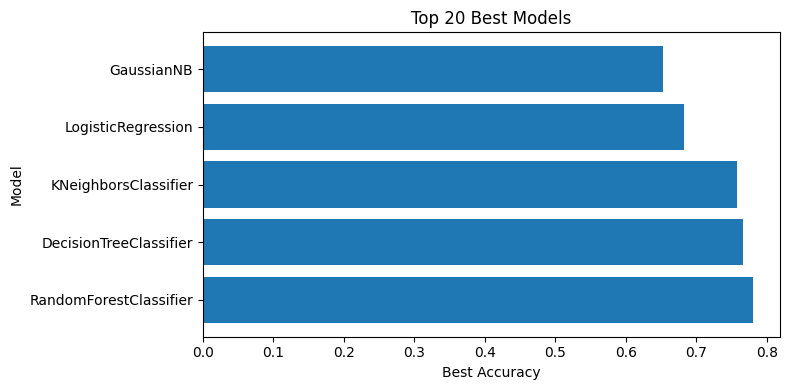

In [19]:
top_20_models = results_df.head(20)

plt.figure(figsize=(8, 4))
plt.barh(top_20_models['Model'], top_20_models['Best Accuracy'])
plt.xlabel('Best Accuracy')
plt.ylabel('Model')
plt.title('Top 20 Best Models')
plt.tight_layout()
plt.show()

In [20]:
results_df.to_csv("models_training_results.csv", index=False)

In [21]:
credit_cat.to_csv("credit_cat.csv",index=False)